['NUMERO' 'NOM' 'TYPE_1' 'TYPE_2' 'POINTS_DE_VIE' 'NIVEAU_ATTAQUE'
 'NIVEAU_DEFENSE' 'NIVEAU_ATTAQUE_SPECIALE' 'NIVEAU_DEFENSE_SPECIALE'
 'VITESSE' 'NOMBRE_GENERATIONS' 'LEGENDAIRE']
   NUMERO              NOM TYPE_1  TYPE_2  POINTS_DE_VIE  NIVEAU_ATTAQUE  \
0       1       Bulbizarre  Herbe  Poison             45              49   
1       2       Herbizarre  Herbe  Poison             60              62   
2       3       Florizarre  Herbe  Poison             80              82   
3       4  Mega Florizarre  Herbe  Poison             80             100   
4       5        Salameche    Feu     NaN             39              52   

   NIVEAU_DEFENSE  NIVEAU_ATTAQUE_SPECIALE  NIVEAU_DEFENSE_SPECIALE  VITESSE  \
0              49                       65                       65       45   
1              63                       80                       80       60   
2              83                      100                      100       80   
3             123                      1

/tmp/ipykernel_859/4048015848.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nosPokemonsClean['NOM'][62] = "Colossinge"
/tmp/ipykernel_859/4048015848.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

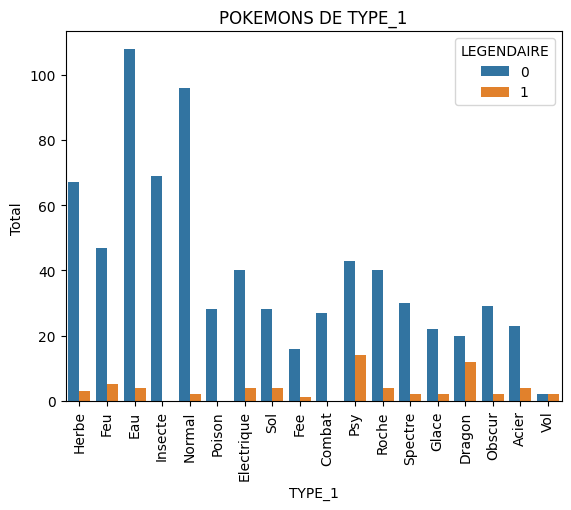

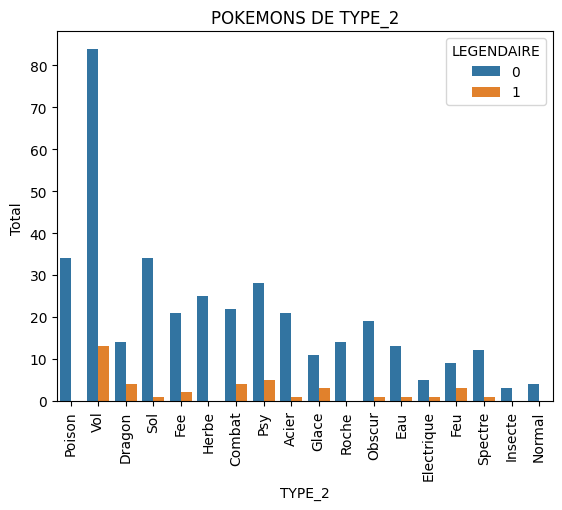

            POURCENTAGE_DE_VICTOIRES
TYPE_1                              
Fee                         0.329300
Roche                       0.404852
Acier                       0.424529
Poison                      0.433262
Insecte                     0.439006
Glace                       0.439604
Herbe                       0.440364
Eau                         0.469357
Combat                      0.475616
Spectre                     0.484027
Normal                      0.535578
Sol                         0.541526
Psy                         0.545747
Feu                         0.579215
Obscur                      0.629726
Electrique                  0.632861
Dragon                      0.633587
Vol                         0.765061


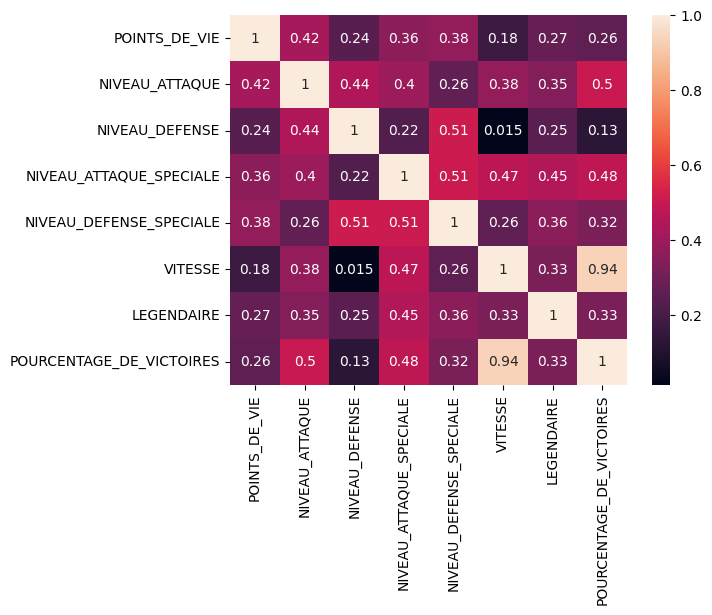

In [23]:
import numpy as npm
import pandas as pd

########DÉBUT PARTIE 1########

##Données du fichier pokédex

pd.set_option('display.max_columns',None)
pd.set_option('future.no_silent_downcasting',True)

#lecture du fichier .csv
nosPokemons = pd.read_csv("datas/pokedex.csv")
print(nosPokemons.columns.values)

nosPokemonsClean = nosPokemons
#remplace la catégorie vrai  ou fauc par 1 ou 0
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("VRAI", 1)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("FAUX", 0)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].astype(int)

##imprime les infos ds pokémons
print(nosPokemonsClean.head())
print(nosPokemonsClean.shape)
print(nosPokemonsClean.info())
##on s'Assure que les pokémons qu'on a ne sont pas null(dont le nom est null)
print(nosPokemonsClean[nosPokemonsClean['NOM'].isnull()])

print(nosPokemonsClean['NOM'][61])
print(nosPokemonsClean['NOM'][63])
##permet de changer le nom du pokémon 62(puisqu'il n'en a pas)
nosPokemonsClean['NOM'][62] = "Colossinge"
print(nosPokemonsClean['NOM'][62])

##Données du fichier combat
#Lecture du fichier .csv
combats = pd.read_csv("datas/combats.csv")

print(combats.columns.values)

print(combats.head(10))
print (combats.shape)
print (combats.info())

##Déterminer le nombre de fois que les pokemons ont été à la premiere place
nbFoisPremierePosition = combats.groupby('Premier_Pokemon').count()
print(nbFoisPremierePosition)

##Déterminer le nombre de fois que les pokemons ont été à la seconde place
nbFoisSecondePosition = combats.groupby('Second_Pokemon').count()
print(nbFoisSecondePosition)

##calculer le nombre total de combats
nombreTotalDeCombats = nbFoisPremierePosition + nbFoisSecondePosition
print(nombreTotalDeCombats)

##déterminer le nombre de combats gagnés
nombreDeVictoires = combats.groupby('Pokemon_Gagnant').count()
print(nombreDeVictoires)


listeAAgreger = combats.groupby('Pokemon_Gagnant').count()
listeAAgreger.sort_index()

#On ajoute le nombre de combats
listeAAgreger['NBR_COMBATS'] = nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant

#On ajoute le nombre de victoires
listeAAgreger['NBR_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon

#On calcule le pourcentage de victoires
listeAAgreger['POURCENTAGE_DE_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon / (nbFoisPremierePosition.Pokemon_Gagnant + nbFoisSecondePosition.Pokemon_Gagnant)

#On affiche la nouvelle liste
print(listeAAgreger)


##on va merge les infos de combats avec le pokédex précédent
nouveauPokedex = nosPokemonsClean.merge(listeAAgreger, left_on='NUMERO', right_index = True, how='left')
print(nouveauPokedex.describe())

########FIN PARTIE 1########

########DÉBUT PARTIE 2########

print("\nPartie 2\n")
print(nouveauPokedex.describe())

import matplotlib.pyplot as plt
import seaborn as sns

#on va essayer de déterminer quels pokémons  de type 1 seraient les plus efficaces a travers une modélisation graphique 
axe_X = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation= 90)
plt.xlabel('TYPE_1')
plt.ylabel('Total ')
plt.title("POKEMONS DE TYPE_1")
plt.show()

#on va essayer de déterminer quels pokémons  de type 2 seraient les plus efficaces a travers une modélisation graphique 
axe_X = sns.countplot(x="TYPE_2", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation= 90)
plt.xlabel('TYPE_2')
plt.ylabel('Total ')
plt.title("POKEMONS DE TYPE_2")
plt.show()

##Déterminer le pourcantage de victoire 
print(nouveauPokedex.groupby('TYPE_1').agg({"POURCENTAGE_DE_VICTOIRES": "mean"}).sort_values(by = "POURCENTAGE_DE_VICTOIRES"))

##Essayer de déterminer les corrélations entre certains types de facteurs de pokémon et leur chance de gagner
corr = nouveauPokedex.loc[:,['POINTS_DE_VIE','NIVEAU_ATTAQUE',
'NIVEAU_DEFENSE','NIVEAU_ATTAQUE_SPECIALE','NIVEAU_DEFENSE_SPECIALE',
'VITESSE','LEGENDAIRE','POURCENTAGE_DE_VICTOIRES']].corr()

sns.heatmap(corr,
xticklabels=corr.columns,
yticklabels=corr.columns, annot=True)
plt.show()

#Sauvegarde du Dataframe Pokedex
dataset = nouveauPokedex
dataset.to_csv("datas/dataset.csv", sep='\t')